In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
from mpl_toolkits import mplot3d

# The Rosenbrock function and its gradient/Hessian

In [2]:
a=2
b=80

def Rosenbrock(x,y):
    return (a - x)**2 + b* (y - x**2)**2

def Grad_Rosenbrock(x,y):
    g_x = -2*a* (a-x) - 4*b*x* (y - x**2)
    g_y = 2*b* (y - x**2)
    return np.array([g_x,g_y])

def Hessian_Rosenbrock(x,y):
    h_xx = 2*a - 4*b*y + 12*b*x**2
    h_xy = -4*b*x
    h_yx = -4*b*x
    h_yy = 2*b
    return np.array([[h_xx,h_xy],[h_yx,h_yy]])

# Gradient Descent implementation

In [3]:
def Gradient_Descent(x,y, eta=0.001, epsilon=1.0e-6, nMax=10000 ):
    #Initialization
    i = 0
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    X = np.array([x,y])
    
    #Looping as long as error is greater than epsilon
    while np.linalg.norm(error) > epsilon and i < nMax:
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)   
        #print(X) 
        
        X_prev = X
        X = X - eta * Grad_Rosenbrock(x,y)
        error = X - X_prev
        x,y = X[0], X[1]
          
    print(X)
    return X, iter_x, iter_y, iter_count


root, iter_x, iter_y, iter_count = Gradient_Descent(-2,2)

[1.6616507  2.87978533]


# Plotting the Gradient Descent iteration steps

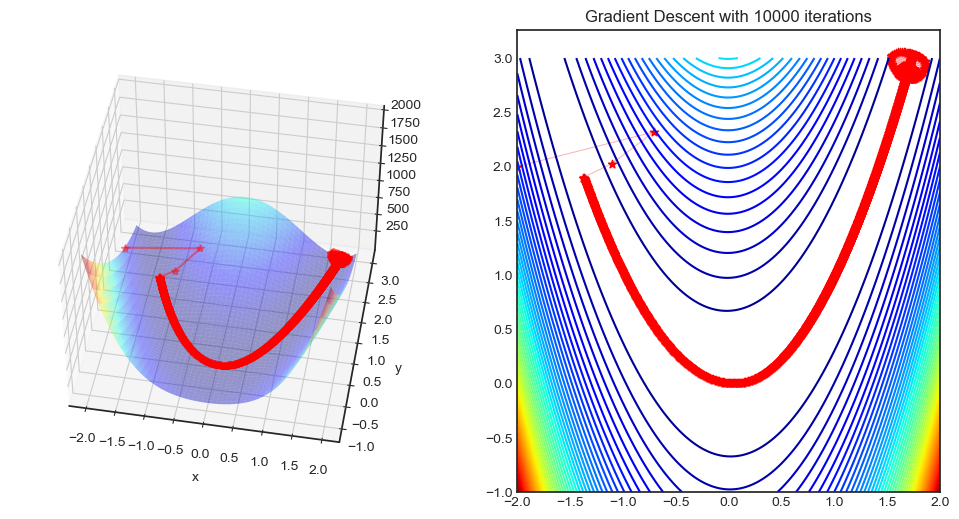

In [4]:
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = Rosenbrock(X, Y)

#Angles needed for quiver plot
anglesx = iter_x[1:] - iter_x[:-1]
anglesy = iter_y[1:] - iter_y[:-1]


fig = plt.figure(figsize = (12,6))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, Rosenbrock(iter_x,iter_y),color = 'r', marker = '*', alpha = .4)

ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', 
          angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))


plt.show()

# Newton's method

In [5]:
def Newton_Raphson_Optimize(x,y, epsilon=0.000001, nMax = 200):
    #Initialization
    i = 0
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    X = np.array([x,y])
    
    #Looping as long as error is greater than epsilon
    while np.linalg.norm(error) > epsilon and i < nMax:
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)   
        print(X) 
        
        X_prev = X
        #X = X - np.linalg.inv(Hessian_Rosenbrock(x,y)) @ Grad_Rosenbrock(x,y)
        X = X - np.linalg.solve(Hessian_Rosenbrock(x,y), Grad_Rosenbrock(x,y))
        error = X - X_prev
        x,y = X[0], X[1]
          
    return X, iter_x, iter_y, iter_count


root, iter_x, iter_y, iter_count = Newton_Raphson_Optimize(-2,2)

[-2  2]
[-1.97515528  3.90062112]
[  1.81294075 -11.06291735]
[1.81310355 3.28734446]
[1.9999996  3.96506828]
[1.99999971 3.99999883]
[2. 4.]


# Plotting the Newton's method iterations steps

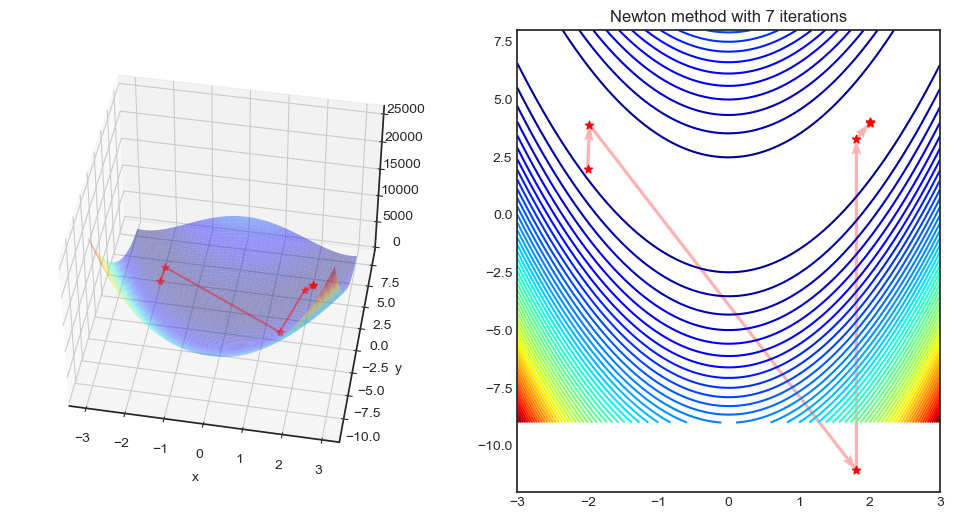

In [6]:
x = np.linspace(-3,3,250)
y = np.linspace(-9,8,350)
X, Y = np.meshgrid(x, y)
Z = Rosenbrock(X, Y)

#Angles needed for quiver plot
anglesx = iter_x[1:] - iter_x[:-1]
anglesy = iter_y[1:] - iter_y[:-1]

%matplotlib inline
fig = plt.figure(figsize = (12,6))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, Rosenbrock(iter_x,iter_y),color = 'r', marker = '*', alpha = .4)

#Rotate the initialization to help viewing the graph
ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')

#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 60, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', 
          angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Newton method with {} iterations'.format(len(iter_count)))

plt.show()